# Random Forest

## Challenge: If a tree falls in the forest...

by: Melissa N 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from IPython.display import display

## DATA CLEANING

In [2]:
# Assign spreadsheet filename to `file`
file = 'table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls'
# Load spreadsheet
xl = pd.ExcelFile(file)
# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('13tbl8ny')
display(df1.head())

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0


In [3]:
#Adjust df1 to exclude 1st 3 rows.
df = df1[3:len(df1)]
#grab the first row for the header set the header row as the df header
df.columns = df.iloc[0]

In [4]:
## Make Columns easier to read 

df.columns = ["City", "Population","Violent_crime","Murder","Rape_revised","Rape_legacy"
                 ,"Robbery","Aggravated_assault","Property_crime","Burglary","Larceny_theft","Motor_vehicle_theft","Arson3"]

In [5]:

df = df[1:]
df.index = range(0,len(df))
# Removing the columns with NAN
df.drop(['Rape_revised','Arson3'], inplace=True, axis=1)
#Adjust df to exclude the last 3 rows
# dropping the row
df = df.iloc[:347]

In [6]:
# convert columns to numeric.
df.loc[:,'Property_crime'] = pd.to_numeric(df.loc[:,'Property_crime'])
df.loc[:,'Population'] = pd.to_numeric(df.loc[:,'Population'])
df.loc[:,'Violent_crime'] = pd.to_numeric(df.loc[:,'Violent_crime'])
df.loc[:,'Murder'] = pd.to_numeric(df.loc[:,'Murder'])
df.loc[:,'Rape_legacy'] = pd.to_numeric(df.loc[:,'Rape_legacy'])
df.loc[:,'Aggravated_assault'] = pd.to_numeric(df.loc[:,'Aggravated_assault'])
df.loc[:,'Burglary'] = pd.to_numeric(df.loc[:,'Burglary'])
df.loc[:,'Larceny_theft'] = pd.to_numeric(df.loc[:,'Larceny_theft'])
df.loc[:,'Motor_vehicle_theft'] = pd.to_numeric(df.loc[:,'Motor_vehicle_theft'])
df.loc[:,'Robbery'] = pd.to_numeric(df.loc[:,'Robbery'])

In [7]:
display(df.head())

,City,Population,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
0,Adams Village,1861,0,0,0,0,0,12,2,10,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1
2,Akron Village,2846,3,0,0,0,3,16,1,15,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142
4,Albion Village,6388,23,0,3,4,16,223,53,165,5


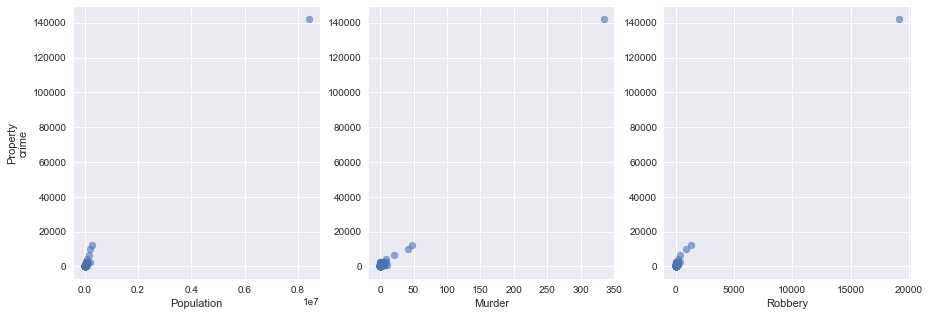

In [8]:
# Look at the scatter plot for Population, Murder and Robbery


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['Population'], df['Property_crime'], alpha=0.6)
plt.xlabel('Population')
plt.ylabel('Property\ncrime')

plt.subplot(1, 3, 2)

plt.scatter(df['Murder'], df['Property_crime'], alpha=0.6)
plt.xlabel('Murder')

plt.subplot(1, 3, 3)


plt.scatter(df['Robbery'], df['Property_crime'], alpha=0.6)
plt.xlabel('Robbery')


plt.show()

Looking at this scatter plot, we can see that there is a lot of outliers. 
One of them occurs where Property and crime is 140,000. So we will try to remove that and other outliers that we may see. 

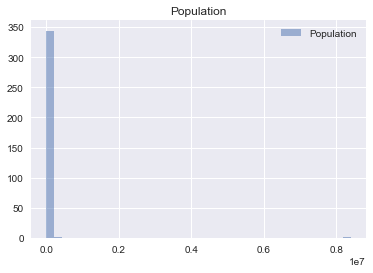

In [9]:
# Look at the histogram of populations"

plt.hist(df['Population'], label = 'Population', alpha = 0.5, bins = 40)
plt.title('Population')
plt.legend(loc='best')
plt.show()

This histogram doesn't tell us anything. 
Hopefully will be helpful or better once we have remove the outliers. 

In [10]:
## From our study we see that there is an outlier when Property and crime is bigger that 10,000 or 3,000
display(df.loc[((df['Murder'] > 0) & (df['Population'] > 100000))] )

print(len(df[df['Murder'] > 0]))
print(len(df[df['Murder'] == 0]))

,City,Population,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236


49
298


In [11]:
## From our study we see that there is an outlier when Property and crime is bigger that 10,000 or 3,000
display(df[df['Property_crime'] > 3000])

,City,Population,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
3,Albany,97956,791,8,30,227,526,4090,705,3243,142
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394


In [12]:
## From our study we see that there is an outlier when Property and crime is bigger that 10,000 or 3,000
display(df[df['Population'] > 100000])

,City,Population,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236


In [13]:
## Drop the rows that seem to contain outliers for Property and crime 
#df.drop(df.index[[7,3,35,216,272,310,346]], inplace=True, axis=0)
## Drop the rows that seem to contain outliers for Property and crime 
#df.drop(df.index[[216]], inplace=True, axis=0)

display(df[df['Population'] > 100000])

,City,Population,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236


We will just remove New York City, because it is a highly populated city and thus create the outlier inn our data.

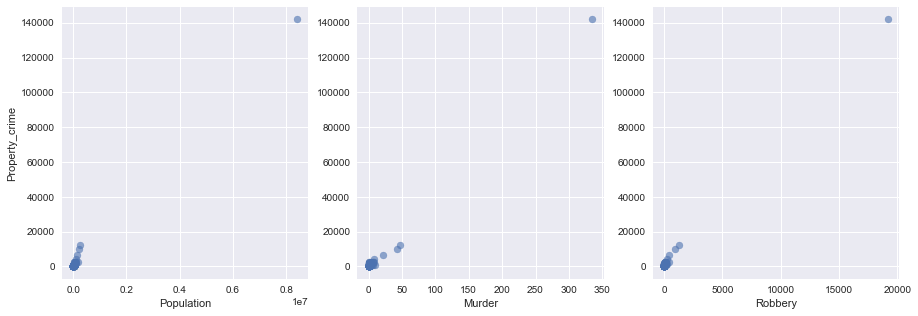

In [14]:
# Look at the scatter plot for Population, Murder and Robbery with cleaned data 

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['Population'], df['Property_crime'], alpha=0.6)
plt.xlabel('Population')
plt.ylabel('Property_crime')

plt.subplot(1, 3, 2)

plt.scatter(df['Murder'], df['Property_crime'], alpha=0.6)
plt.xlabel('Murder')

plt.subplot(1, 3, 3)


plt.scatter(df['Robbery'], df['Property_crime'], alpha=0.6)
plt.xlabel('Robbery')


plt.show()

The scatter plots looks better.     
We can clearly see that there is a lot of information for City with Property Crime less that 1000 and Population around 50,000.    
For Murder and nonnegligent manslaugther most of them are in place where there is 2 or less occurences.   
For Robbery it looks like most of them occure where there is a 50 or less occurences.  

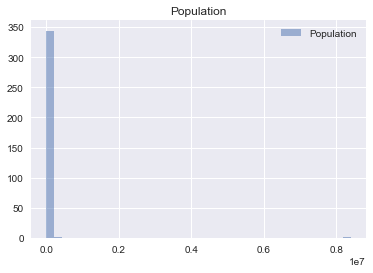

In [15]:
# Look at the histogram of population with clean data 

plt.hist(df['Population'], label = 'Population', alpha = 0.5, bins = 40)
plt.title('Population')
plt.legend(loc='best')
plt.show()

In [16]:
# Making dummies.
# Also creating a data frame to hold our features.
features_13 = df
display(features_13.head())

,City,Population,Violent_crime,Murder,Rape_legacy,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft
0,Adams Village,1861,0,0,0,0,0,12,2,10,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1
2,Akron Village,2846,3,0,0,0,3,16,1,15,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142
4,Albion Village,6388,23,0,3,4,16,223,53,165,5


In [17]:
###Make Everything per capita by dividing other columns by population
### features per capita

df_f = df[['Violent_crime', 'Murder', 'Rape_legacy',
       'Robbery', 'Aggravated_assault', 'Property_crime', 'Burglary',
       'Larceny_theft', 'Motor_vehicle_theft']].div(df.Population, axis=0)

In [18]:
## Multiply all rows by a 1,000

df_f.ix[:,~np.in1d(df_f.dtypes,['object','datetime'])] *= 1000

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df_f['Motor_vehicle_theft'].head()

0    0.000000
1    0.388048
2    0.000000
3    1.449630
4    0.782718
Name: Motor_vehicle_theft, dtype: float64

In [20]:
df.columns

Index(['City', 'Population', 'Violent_crime', 'Murder', 'Rape_legacy',
       'Robbery', 'Aggravated_assault', 'Property_crime', 'Burglary',
       'Larceny_theft', 'Motor_vehicle_theft'],
      dtype='object')

In [21]:
df_f['Murder'].describe()

count    347.000000
mean       0.011052
std        0.034877
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.227435
Name: Murder, dtype: float64

In [22]:
## Make a category 

df_f['Rape_legacy_high'] = np.where(df_f['Rape_legacy']>0, 1, 0)
df_f['Murder_high'] = np.where(df_f['Murder']>0, 1, 0)
df_f['Motor_vehicle_theft_high'] = np.where(df_f['Motor_vehicle_theft']>0, 1, 0)

### Rape_legacy

Runtime: 0.23806799999999928 seconds


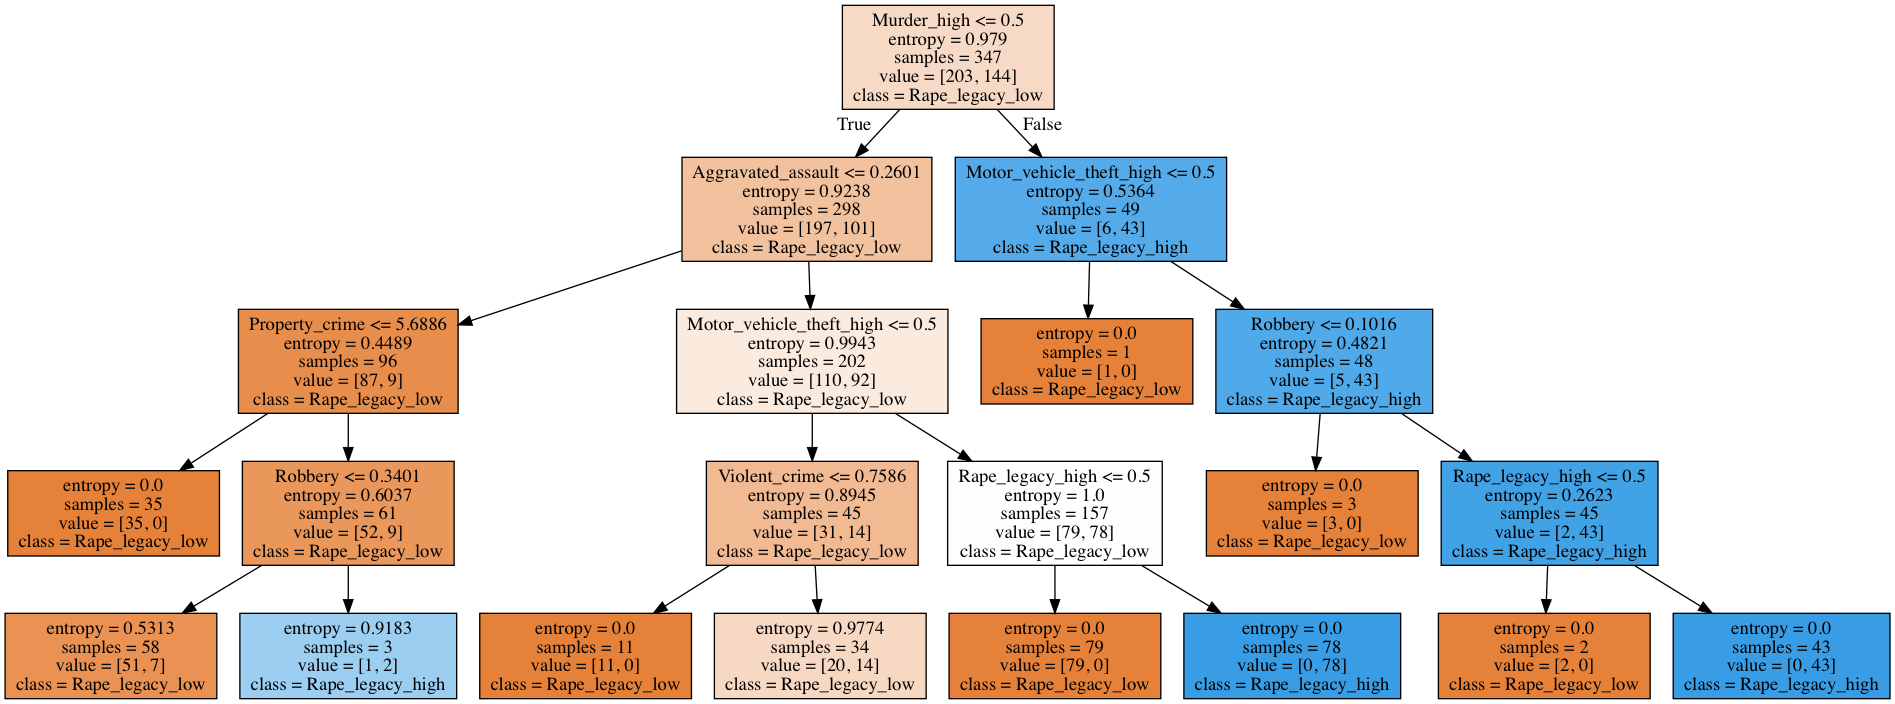

In [23]:
X = df_f.drop(['Rape_legacy'], axis=1)
X = pd.get_dummies(X)
Y = df_f['Rape_legacy_high']

# Set the start time for execution speed.
import time
start_time = time.clock() 



# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    #random_state = 1337
)
decision_tree.fit(X, Y)

print('Runtime: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names= X.columns,
    class_names=['Rape_legacy_low', 'Rape_legacy_high'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Murder

Runtime: 0.0026760000000001227 seconds


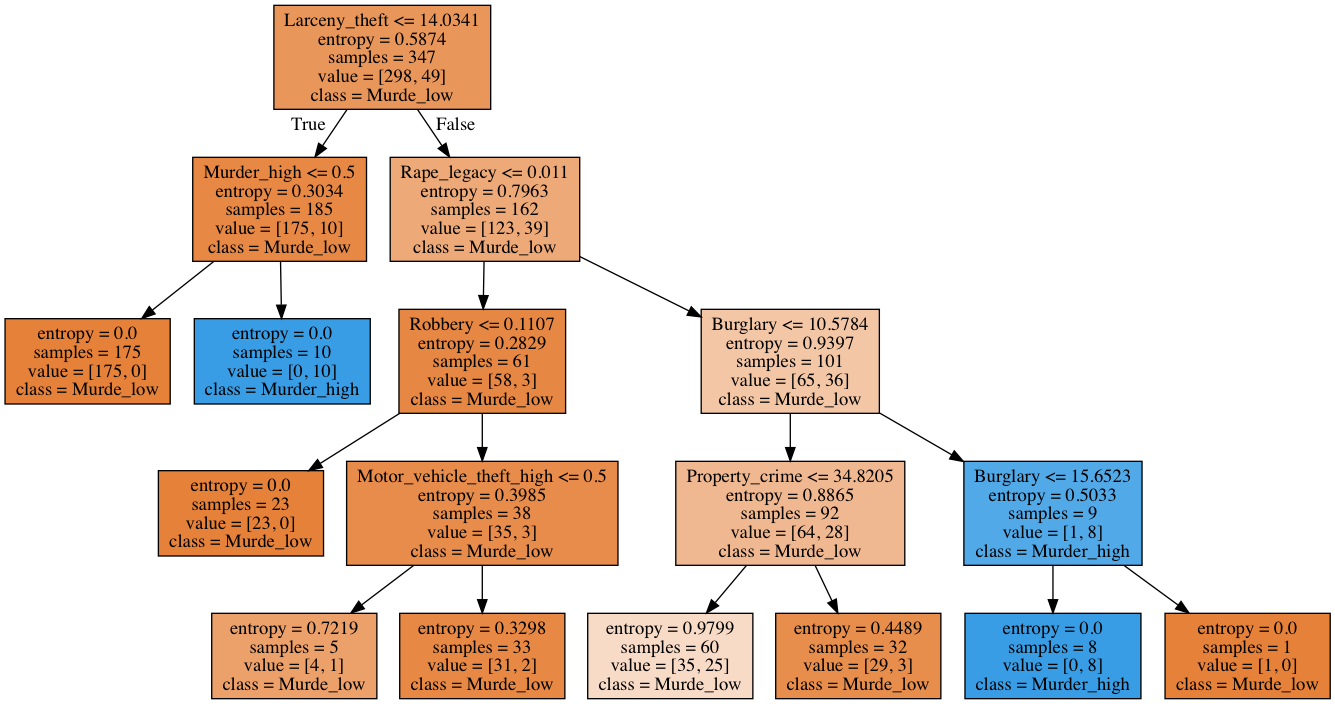

In [24]:
X = df_f.drop(['Murder'], axis=1)
X = pd.get_dummies(X)
Y = df_f['Murder_high']

# Set the start time for execution speed.
import time
start_time = time.clock() 



# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    #random_state = 1337
)
decision_tree.fit(X, Y)

print('Runtime: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names= X.columns,
    class_names=['Murde_low', 'Murder_high'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Motor_vehicle_theft

Runtime: 0.0023180000000007084 seconds


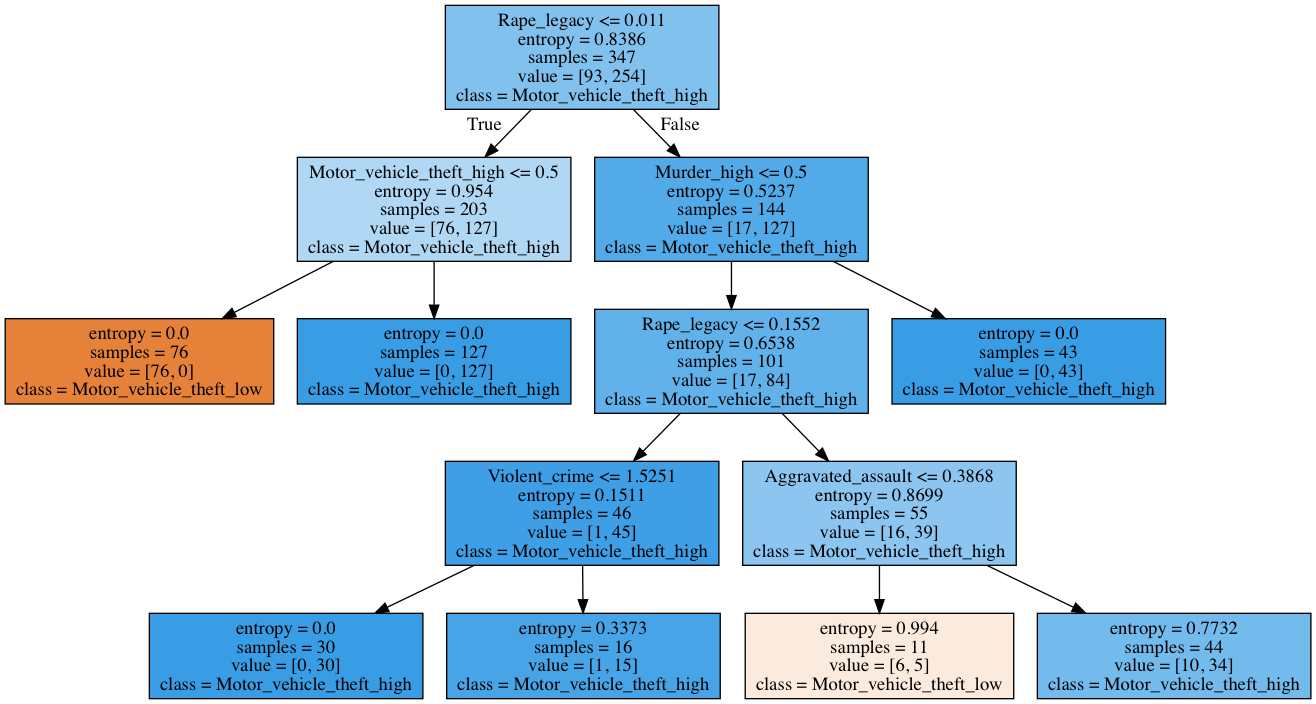

In [25]:
X = df_f.drop(['Motor_vehicle_theft'], axis=1)
X = pd.get_dummies(X)
Y = df_f['Motor_vehicle_theft_high']

# Set the start time for execution speed.
import time
start_time = time.clock() 



# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    #random_state = 1337
)
decision_tree.fit(X, Y)

print('Runtime: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names= X.columns,
    class_names=['Motor_vehicle_theft_low', 'Motor_vehicle_theft_high'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Random Forest 

### Rape_legacy

In [28]:
# Run the Random Forest classifier.
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

# Set the start time for execution speed.
import time
start_time = time.clock() 

rfc = ensemble.RandomForestClassifier()
X1 = df_f.drop('Rape_legacy', 1)
Y1 = df_f['Rape_legacy_high']
X1 = pd.get_dummies(X1)
X1 = X1.dropna(axis=1)

print('Runtime: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

print('Scores:', cross_val_score(rfc, X1, Y1, cv=10))

print('\nAverage score:', cross_val_score(rfc, X1, Y1, cv=10).mean())

Runtime: 0.00948300000000124 seconds
Scores: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]

Average score: 1.0


### Murder

In [33]:
# Run the Random Forest classifier.
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

# Set the start time for execution speed.
import time
start_time = time.clock() 

rfc = ensemble.RandomForestClassifier()
X2 = df_f.drop('Murder', 1)
Y2 = df_f['Rape_legacy_high']
X2 = pd.get_dummies(X2)
X2 = X2.dropna(axis=1)

print('Runtime: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

print('Scores:', cross_val_score(rfc, X2, Y2, cv=10))

print('\nAverage score:', cross_val_score(rfc, X2, Y2, cv=10).mean())

Runtime: 0.010159999999999059 seconds
Scores: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]

Average score: 1.0


### Motor_vehicle_theft

In [31]:
# Run the Random Forest classifier.
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

# Set the start time for execution speed.
import time
start_time = time.clock() 

rfc = ensemble.RandomForestClassifier()
X3 = df_f.drop('Motor_vehicle_theft', 1)
Y3 = df_f['Motor_vehicle_theft_high']
X3 = pd.get_dummies(X3)
X3 = X3.dropna(axis=1)

print('Runtime: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

print('Scores:', cross_val_score(rfc, X3, Y3, cv=10))

print('\nAverage score:', cross_val_score(rfc, X3, Y3, cv=10).mean())

Runtime: 0.00959600000000016 seconds
Scores: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]

Average score: 1.0
